# Data Input and preprocessing

In [2]:
import numpy as np
from function import loadData, show_data, preprocessing, showDistribution, removenans, crossplot, kMeans, Hdbscan, plotResult
from function import kmeans_param_ch, kmeans_param_sc, calculatef1, Kmeans_cluster_ch, Kmeans_cluster_sc, hdbscan_param
from function import hdbscan_cluster, hdbscan_sample, calculateAri, calculateAmi, calculateVm, output_2D, plotInputData

## Load Data

In [3]:
data = np.load('C:/Users/12928/Desktop/SyntheticDatasets/Model5b/output_fields_smooth.npz')

data_list = loadData(data)


## Plot Input Data

Using function show_data() to draw each parameter of input data. 

There are three parameters of show_data(), which are dataset, the number of rows and the number of columns.

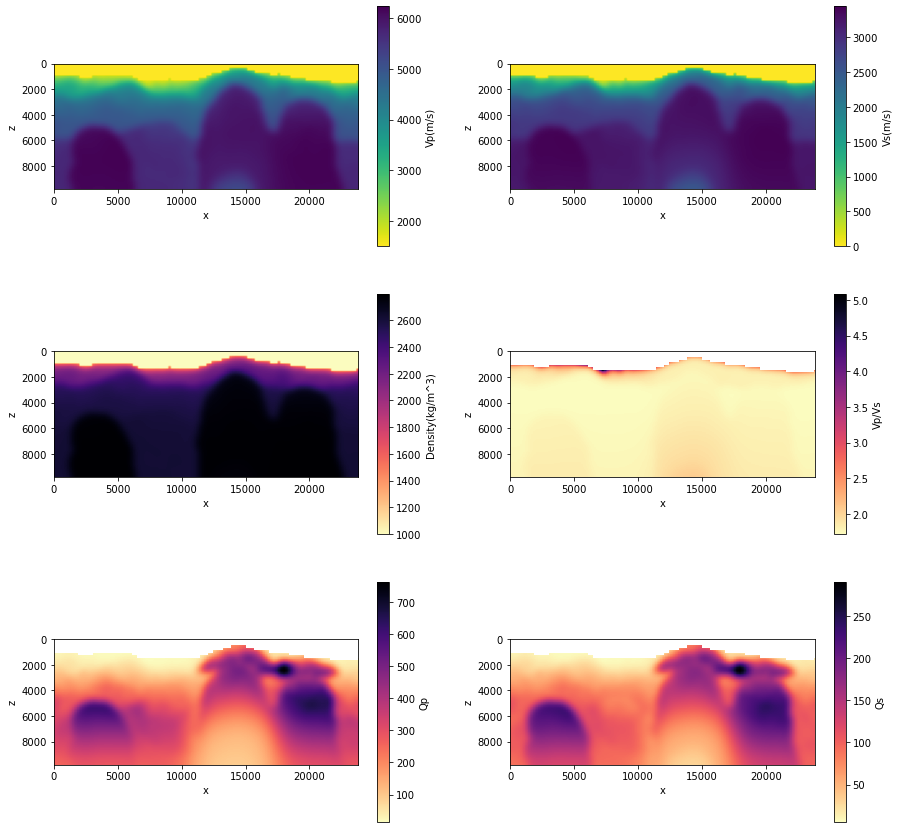

In [4]:
show_data(data_list,3,2)

Using removenans() to remove points with nan values from array. 

- new_data is the original data saved in the form of np.array.

- data_noNan removes nan values from new_data. 

- nan_list is the list of nan values index.

In [5]:
new_data,data_noNan,nan_list = removenans(data)

Using showDistribution() to show the distribution of each parameter. Since the last two parameters of new_data is 'x' and 'z', we only use new_data[:,:-2]

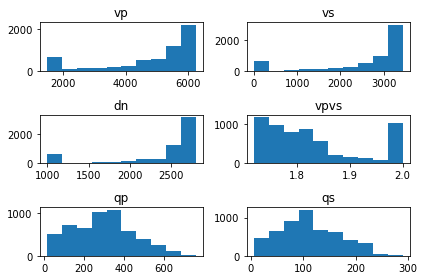

In [6]:
showDistribution(new_data[:,:-2])

Using crossplot to plot the cross-plot (scatter plot) of each pair of physical properties (other parameters and vp)

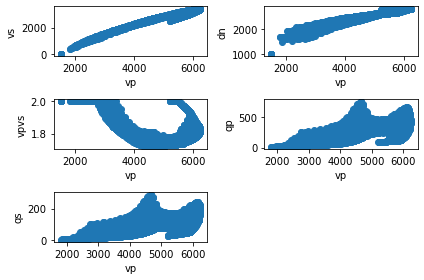

In [7]:
crossplot(new_data)

## Data Preprocessing

Using preprocessing() to make data standardized

In [8]:
# remove the mean
# divide by the variance

data_preprocessing = preprocessing(data_noNan) 


## Plot Data after Preprocessing

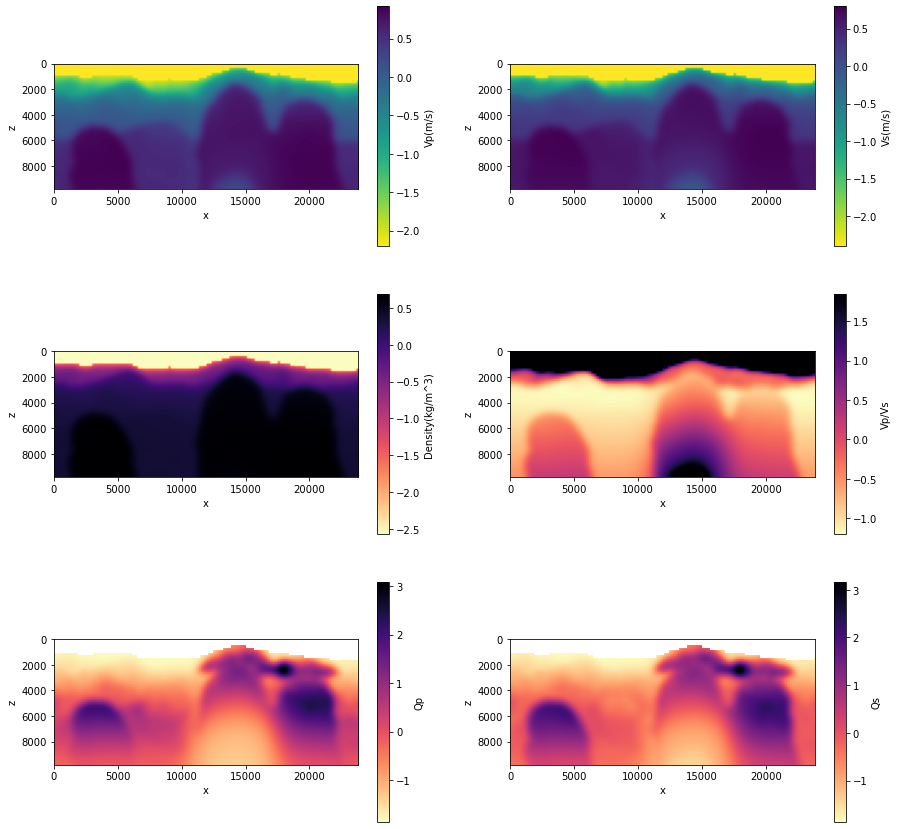

In [9]:
data_list = []
data1 = preprocessing(new_data)
for i in range(data_preprocessing.shape[1]-2):
    data_list.append(data1[:,i].reshape(50,120))
show_data(data_list,3,2)

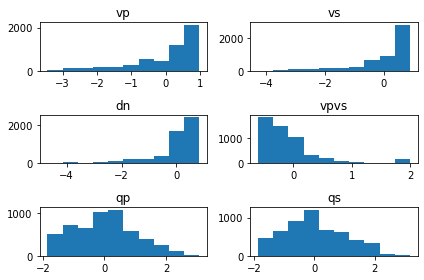

In [10]:
showDistribution(data_preprocessing[:,:-2])

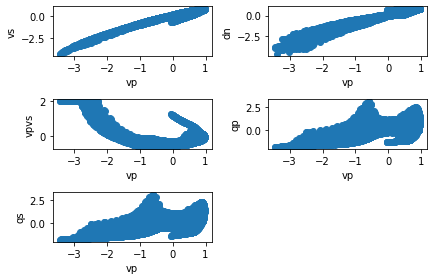

In [11]:
crossplot(data_preprocessing)

## Input Data

Loading and plotting input data.

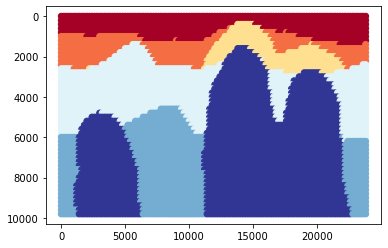

In [12]:
input_data = np.load('C:/Users/12928/Desktop/SyntheticDatasets/Model5b/input_fields.npz')
plotInputData(input_data)

## KMeans

Using KMeans() to divide data in clusters.

- result_k is the result of KMeans and data_preprocessing is normalized data with no nan value
- output_k is labels for all data after KMeans

Using plotResult() to show the result of clusters.

- data is the original input data
- output_k is labels for all data after Kmeans

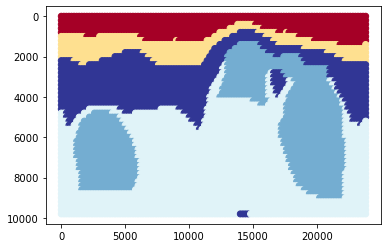

In [13]:
result_k = kMeans(4, data_preprocessing[:,:-2])
output_k = output_2D(result_k,nan_list)
plotResult(data,output_k)

## Tuning Parameters

### Using Calinsky-Harabasz score to tune KMeans parameters

In [14]:
parameters_k = kmeans_param_ch(data_preprocessing[:,:-2])

{'the best number of cluster': 13 }


### Using Silhouette score score to tune KMeans parameters

In [15]:
parameters_k = kmeans_param_sc(data_preprocessing[:,:-2])

{'the best number of cluster': 7 }


### Using F1-score to choose an internal validation index

### CH score

In [16]:
result_k = kMeans(13, data_preprocessing[:,:-2])
output_k = output_2D(result_k,nan_list)
calculatef1(output_k,input_data)

F1-score is:  0.17083333333333334


### SS score

In [17]:
result_k = kMeans(7, data_preprocessing[:,:-2])
output_k = output_2D(result_k,nan_list)
calculatef1(output_k,input_data)

F1-score is:  0.06133333333333333


After comparision, CH score is a better internal validation index.
Plotting result of best parameters.
KMeans() have two parameters.
- The first one is the number of clusters.
- The second one is dataset.

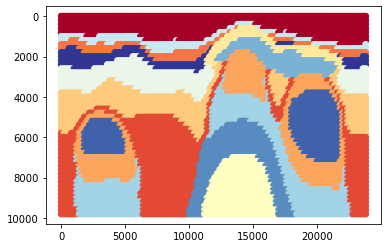

In [18]:
result_k = kMeans(13, data_preprocessing[:,:-2])
output_k = output_2D(result_k,nan_list)
plotResult(data,output_k)

## Validation
### Calinsky-Harabasz score

Using Kmeans_cluster_ch to see changes of calinsky-Harabasz score with the number of clusters changing.

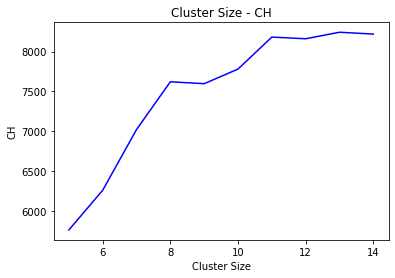

In [19]:
Kmeans_cluster_ch(data_preprocessing[:,:-2])

### Silhouette score

Using Kmeans_cluster_sc to see changes of silhouette score with the number of clusters changing.

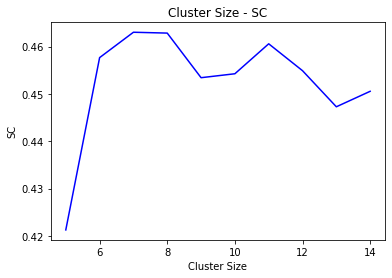

In [20]:
Kmeans_cluster_sc(data_preprocessing[:,:-2])

## HDBSCAN

Using Hdbscan() to divide data in clusters.

- result_h is the result of Hdbscan and data_preprocessing is normalized data with no nan value
- output_h is labels for all data after Hdbscan

Using plotResult() to show the result of clusters.

- data is the original input data
- output_h is labels for all data after Hdbscan

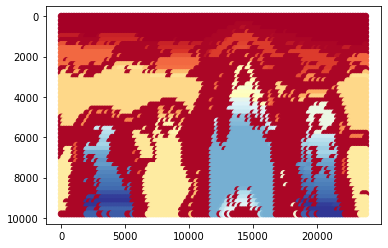

In [21]:
result_h, score_h = Hdbscan(data_preprocessing[:,:-2])
output_h = output_2D(result_h,nan_list)
plotResult(data,output_h)

## Tuning Parameters

Using hdbscan_param() to tuning HDBSCAN parameters

In [22]:
hdbscan_param(data_preprocessing[:,:-2])

{'min_cluster_size': 20 'min_sample_size': 35 }


Plotting result of best parameters.
Hdbscan() have three parameters.
- The first one is the dataset.
- The second one is the minimum size of clusters. It has default value 4.
- The third one is the minimum size of samples. It has default value 10.

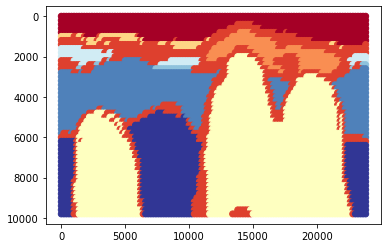

0.46658219742138896


In [23]:
result_h, score_h = Hdbscan(data_preprocessing[:,:-2],min_size=20,min_sample=35)
output_h = output_2D(result_h,nan_list)
plotResult(data,output_h)
print(score_h)

## Validation

Using hdbscan_cluster to see changes of relative validity with the minimum size of clusters changing.

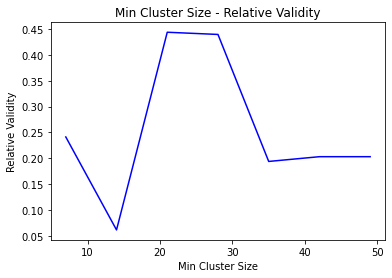

In [24]:
hdbscan_cluster(data_preprocessing[:,:-2])

Using hdbscan_sample to see changes of relative validity with the minimum size of samples changing.

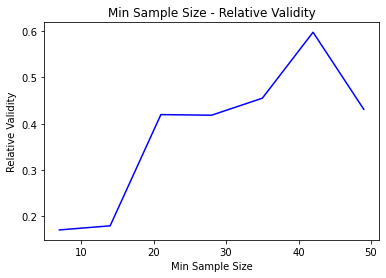

In [25]:
hdbscan_sample(data_preprocessing[:,:-2])

## Compare KMeans, HDBSCAN with Input Data

In [26]:
output_k = output_k.reshape(-1)
output_h = output_h.reshape(-1)
input_label = input_data['classes'].reshape(-1)

### Adjusted Rand Index

Using calculateAri() to calculate adjusted rand index for two cluster results.

#### KMeans

In [27]:
ari_k = calculateAri(output_k, input_label)
print("Adjusted Rand Index of KMeans is ", ari_k)

Adjusted Rand Index of KMeans is  0.39715130630749557


#### HDBSCAN

In [28]:
ari_h = calculateAri(output_h, input_label)
print("Adjusted Rand Index of HDBSCAN is ",ari_h)

Adjusted Rand Index of HDBSCAN is  0.8048620277461086


### Adjusted Mutual Information

Using calculateAmi() to calculate adjusted mutual information for two cluster results.

#### KMeans

In [29]:
ami_k = calculateAmi(output_k, input_label)
print("Adjusted Mutual Information of KMeans is ", ami_k)

Adjusted Mutual Information of KMeans is  0.654832357376686


#### HDBSCAN

In [30]:
ami_h = calculateAmi(output_h, input_label)
print("Adjusted Mutual Information of HDBSCAN is ", ami_h)

Adjusted Mutual Information of HDBSCAN is  0.7859632969180321


### V-measure

Using calculateVm() to calculate V-measure for two cluster results.

#### KMeans

In [31]:
vm_k = calculateVm(output_k, input_label)
print("V-measure of KMeans is ", vm_k)

V-measure of KMeans is  0.6557565269714478


#### HDBSCAN

In [32]:
vm_h = calculateVm(output_h, input_label)
print("V-measure of HDBSCAN is ", vm_h)

V-measure of HDBSCAN is  0.7864046557195257


## Testing with Various Input Parameters

Testing with different sets of characteristics.

Dataset has 8 characteristics called Vp, Vs, Density, Vp/Vs, Qp, Qs, x, z, and the index of them is 0, 1, 2, 3, 4, 5, 6, 7.

In [33]:
testData1 = data_preprocessing[:,[0,1,3]]
testData2 = data_preprocessing[:,[0,2,4]]
testData3 = data_preprocessing[:,[0,1]]

- testData1 selects Vp, Vs and Vp/Vs.
- testData2 selects Vp, Density and Qp.
- testData3 selectes Vp and Vs.

## Vp, Vs, Vp/Vs

### KMeans

In [36]:
kmeans_param_ch(testData1)

{'the best number of cluster': 14 }


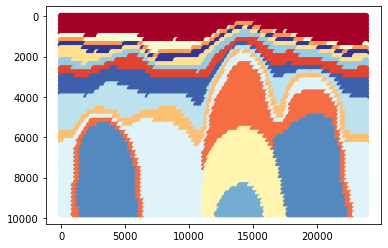

In [38]:
result_k = kMeans(14, testData1)
output_k = output_2D(result_k,nan_list)
plotResult(data,output_k)

### HDBSCAN

In [39]:
hdbscan_param(testData1)

{'min_cluster_size': 45 'min_sample_size': 35 }


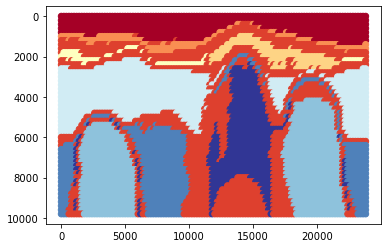

0.41762682409962987


In [40]:
result_h, score_h = Hdbscan(testData1,min_size=45,min_sample=35)
output_h = output_2D(result_h,nan_list)
plotResult(data,output_h)
print(score_h)

## Vp, Density, Qp

### KMeans

In [42]:
kmeans_param_ch(testData2)

{'the best number of cluster': 14 }


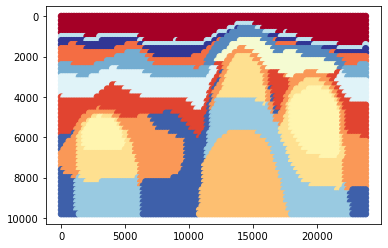

In [44]:
result_k = kMeans(14, testData2)
output_k = output_2D(result_k,nan_list)
plotResult(data,output_k)

### HDBSCAN

In [45]:
hdbscan_param(testData2)

{'min_cluster_size': 35 'min_sample_size': 10 }


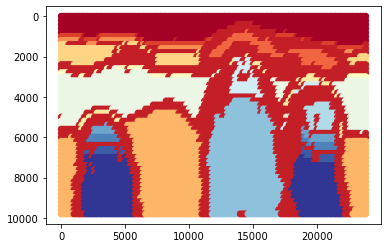

0.37819699318328065


In [46]:
result_h, score_h = Hdbscan(testData2,min_size=35,min_sample=10)
output_h = output_2D(result_h,nan_list)
plotResult(data,output_h)
print(score_h)

## Vp, Vs

### KMeans

In [47]:
kmeans_param_ch(testData3)

{'the best number of cluster': 14 }


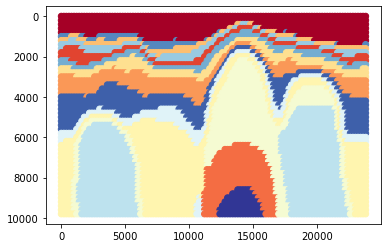

In [48]:
result_k = kMeans(14, testData3)
output_k = output_2D(result_k,nan_list)
plotResult(data,output_k)

### HDBSCAN

In [49]:
hdbscan_param(testData3)

{'min_cluster_size': 30 'min_sample_size': 45 }


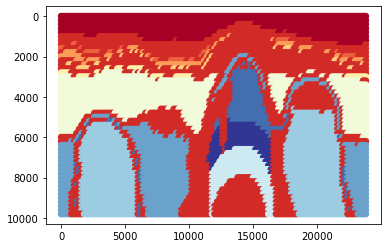

0.5266026270349077


In [50]:
result_h, score_h = Hdbscan(testData3,min_size=30,min_sample=45)
output_h = output_2D(result_h,nan_list)
plotResult(data,output_h)
print(score_h)